# PEC 2. Introducción a los sistemas de recuperación de la información.

En esta PEC vamos a desarrollar un sistema de recuperación de la información básico. Partiendo de una lista de documentos de texto, deberás utilizar las técnicas de recuperación de la información vistas en la asignatura para obtener, procesar y analizar datos útiles a partir del contenido.


## Ejercicio 3: tareas básicas

Además de las ya clásicas `pandas` y `numpy`, utilizaremos la librería [NLTK](https://es.wikipedia.org/wiki/NLTK) (Natural Language Toolkit), una librería de Python utilizada para analizar texto y aprendizaje automático.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 3.1 Separando las palabras (Tokenización)

El significado de cada sentencia se obtiene de las palabras que contiene. Así que analizando las palabras presentes en un texto puede interpretarse el significado. Así que lo primero que hay que hacer para tratar el texto es separar las palabras que lo componen, es decir, hacer una lista de palabras. El modelo que utilizaremos aquí se denomina [**bolsa-de-palabras**](https://es.wikipedia.org/wiki/Modelo_bolsa_de_palabras) (bag-of-words) ya que nos interesan las palabras sin importar su posición o importancia en el documento.

La separación de las palabras o tokenización consiste en separar el texto en palabras, también llamadas tokens. Generalmente, el "espacio" se utiliza para separar palabras y elementos como los puntos, comas, dos puntos, etc., se utilizan para separar frases.

Existen múltiples formas de realizar la separación de palabras para un texto determinado.

### 3.1.1 Funciones de Python

Se puede utilizar la función `split()` para separar una cadena de texto en una lista de palabras. De forma predeterminada, `split()` utiliza el espacio en blanco, aunque se puede utilizar cualquier carácter.

In [2]:
text01 = "This sentence is the initial example text that illustrates the concept we're discussing."
text01.split(' ')

['This',
 'sentence',
 'is',
 'the',
 'initial',
 'example',
 'text',
 'that',
 'illustrates',
 'the',
 'concept',
 "we're",
 'discussing.']

El método `split()` de Python no considera los signos de puntuación como elementos separados.

### 3.1.2 Expresiones regulares

El módulo `re` ofrece un conjunto de funciones para buscar coincidencias en una cadena de texto. Una *expresión regular* es una secuencia de caracteres que definen un patrón de búsqueda.

In [3]:
import re

text02 = """There are multiple ways we can perform tokenization on given text data. We can choose any method based on language, library and purpose of modeling."""

# TODO: Utiliza una expresión regular para separar las palabras utilizando la librería re
palabras = re.findall(r'\w+\b', text02)
#w palabra
#siguiente a w como uno o mas de caracteres
#b describe el limite de w



In [4]:
palabras

['There',
 'are',
 'multiple',
 'ways',
 'we',
 'can',
 'perform',
 'tokenization',
 'on',
 'given',
 'text',
 'data',
 'We',
 'can',
 'choose',
 'any',
 'method',
 'based',
 'on',
 'language',
 'library',
 'and',
 'purpose',
 'of',
 'modeling']

### 3.1.3 Con NLTK

El Natural Language Toolkit (NLTK) tiene la función `word_tokenize()` para la separación de palabras y `sent_tokenize()` para la separación de frases.

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize

text03 = "<p>This is the first sentence. A gallon-of-milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is!</p>"

# TODO: separar las frases
import nltk
nltk.download('punkt')

frases = sent_tokenize(text03)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
frases

['<p>This is the first sentence.',
 'A gallon-of-milk in the U.S. costs $2.99.',
 'Is this the third sentence?',
 'Yes, it is!</p>']

## 3.2. Eliminación de números y símbolos. Conversión a minúsculas

Como puede comprobarse, `word_tokenizer()` mantiene los signos de puntuación, así como los números y otros símbolos.

Una estrategia para reducir el número de palabras/tokens es convertirlas a minúsculas, puesto que algunos signos de puntuación pueden modificar la letra inicial de las palabras. De esta forma, se reduce el número de variantes de una misma palabra.

In [7]:
import string

def remove_tags (s):
  # TODO: eliminar tags html
  p = re.compile(r'<[^>]+>')
  # exp reg que empieza por < luego en el
  #interior algo que no sea > y al exterior >
  return p.sub('-', s)

# TODO : Eliminar etiquetas, tokenizar, convertir a minúsculas y eliminar símbolos no alfabéticos y números:
def tokenize_and_remove_punctuations(s):
    s= remove_tags(s)
    ss=re.sub(r'[^a-zA-Z\s]', '', s)
    #los corchetes definen que cualquier grupo de caracteres definido dentro
    #^ es not
    #a-zA-Z rango
    #\s es un espacio en blanco, incluye \n y \t (salto de linea y tabulacion)
    return nltk.word_tokenize( ss.lower() )

print ((tokenize_and_remove_punctuations (text03)))

['this', 'is', 'the', 'first', 'sentence', 'a', 'gallonofmilk', 'in', 'the', 'us', 'costs', 'is', 'this', 'the', 'third', 'sentence', 'yes', 'it', 'is']


In [8]:
tokenize_and_remove_punctuations (text03)

['this',
 'is',
 'the',
 'first',
 'sentence',
 'a',
 'gallonofmilk',
 'in',
 'the',
 'us',
 'costs',
 'is',
 'this',
 'the',
 'third',
 'sentence',
 'yes',
 'it',
 'is']

## 3.3. Palabras vacías

Las *palabras vacías* (stopwords) son las palabras más comunes en cualquier idioma, tienen sentido gramatical pero tienen un significado limitado en el análisis de un texto. Estas palabras vacías incluyen artículos, preposiciones, conjunciones, pronombres, etc., y su eliminación reduce considerablemente el número de palabras.

NLTK tiene listas de palabras vacías en 16 idiomas. En este caso, se debe cargar la lista en inglés.

In [9]:
# TODO : dada una lista de tokens, elimina aquellos que sean palabras vacías o que tengan una longitud menor o igual a 2.
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_words = []
    for token in tokens:
      if token not in stop_words and len(token) > 2:
        filtered_words.append(token)  # Añadir el token a la nueva lista si no esta en stopwords


    return filtered_words

remove_stop_words(tokenize_and_remove_punctuations (text03))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['first', 'sentence', 'gallonofmilk', 'costs', 'third', 'sentence', 'yes']

## 3.4. Normalización

Muchos idiomas contienen palabras derivadas de otros, y esto se conoce como [flexión](https://es.wikipedia.org/wiki/Flexi%C3%B3n_(ling%C3%BC%C3%ADstica)). La flexión es la modificación de una palabra para expresar diferentes categorías gramaticales como persona, número, género, etc.

El tratamiento de esta flexión para llevar las palabras a una forma base se conoce como normalización de palabras. La normalización permite que, al buscar una palabra, la búsqueda se realice simultáneamente a través de todas sus flexiones.

La **lematización** es el proceso de reducir la inflexión de las palabras para llevarlas a su forma original o raíz. El lema es la parte de la palabra a la que se añade la flexión.

En NLTK existen diferentes lematizadores disponibles, aunque aquí utilizaremos el más conocido: el [algoritmo de Porter](https://es.wikipedia.org/wiki/Algoritmo_de_Porter).

Puede encontrar más información sobre estos procesos en https://www.datacamp.com/community/tutorials/stemming-lemmatization-python.

In [10]:

from nltk.stem import PorterStemmer

# TODO : obtener la versión normalizada de todos los tokens
def stem_words(tokens):
    stemmer = PorterStemmer()
    stemmed_words = []  # Crear una nueva lista vacía para almacenar los tokens procesados
    for token in tokens:  # Iterar sobre cada token en la lista original de tokens
      stemmed_word = stemmer.stem(token)  # Aplicar stemming al token
      stemmed_words.append(stemmed_word)  # Añadir el token procesado a la nueva lista

    return stemmed_words

stem_words ( remove_stop_words(tokenize_and_remove_punctuations (text03)) )

['first', 'sentenc', 'gallonofmilk', 'cost', 'third', 'sentenc', 'ye']

 Una vez realizadas las operaciones básicas sobre el texto, es momento de reunirlo todo en la función `preprocess_data()` que recibe un array de pares `(documentId, text)` y aplica las transformaciones anteriormente descritas.

In [11]:
#TODO
def preprocess_text ( text , stem=True):
    tokens = tokenize_and_remove_punctuations(text)
    tokens = remove_stop_words(tokens)
    if stem:
        tokens = stem_words(tokens)
    else:
      new_tokens = []
      for token in tokens:
        if token.isalpha():  # Comprobar si el token contiene solo letras
          new_tokens.append(token.lower())  # Convertir el token a minúsculas y añadirlo a la nueva lista
      tokens = new_tokens

    return tokens

def preprocess_data(contents, stem=True):
    dataDict = {}
    for key, text in contents.items():
        dataDict[key] = preprocess_text(text, stem=stem)
    return dataDict


In [12]:
document_1 = "I love watching movies when it's cold outside ;-)"
document_2 = "Toy Story is the best animation movie ever, I love it!"
document_3 = "Watching horror movies alone at night is really scary"
document_4 = "He loves to watch films filled with suspense and unexpected plot twists"
document_5 = "My mom loves to watch movies. My dad hates movie theaters. My brothers like any kind of movie. And I haven't watched a single movie since I got into college"
documents = [document_1, document_2, document_3, document_4, document_5]

docIds = ['doc01','doc02','doc03','doc04','doc05']

# TODO : generar una lista de la forma [('doc01', 'I love..'), ... ]
lista = []
for i in range(len(documents)):
    lista.append((docIds[i], documents[i]))
print(lista)
# TODO : preprocesar la lista de documentos de ejemplo
lista=dict(lista)

listatok=preprocess_data(lista)

[('doc01', "I love watching movies when it's cold outside ;-)"), ('doc02', 'Toy Story is the best animation movie ever, I love it!'), ('doc03', 'Watching horror movies alone at night is really scary'), ('doc04', 'He loves to watch films filled with suspense and unexpected plot twists'), ('doc05', "My mom loves to watch movies. My dad hates movie theaters. My brothers like any kind of movie. And I haven't watched a single movie since I got into college")]


In [13]:
preprocess_text(documents[4])

['mom',
 'love',
 'watch',
 'movi',
 'dad',
 'hate',
 'movi',
 'theater',
 'brother',
 'like',
 'kind',
 'movi',
 'havent',
 'watch',
 'singl',
 'movi',
 'sinc',
 'got',
 'colleg']

In [14]:
listatok

{'doc01': ['love', 'watch', 'movi', 'cold', 'outsid'],
 'doc02': ['toy', 'stori', 'best', 'anim', 'movi', 'ever', 'love'],
 'doc03': ['watch', 'horror', 'movi', 'alon', 'night', 'realli', 'scari'],
 'doc04': ['love',
  'watch',
  'film',
  'fill',
  'suspens',
  'unexpect',
  'plot',
  'twist'],
 'doc05': ['mom',
  'love',
  'watch',
  'movi',
  'dad',
  'hate',
  'movi',
  'theater',
  'brother',
  'like',
  'kind',
  'movi',
  'havent',
  'watch',
  'singl',
  'movi',
  'sinc',
  'got',
  'colleg']}

## 3.5. Frecuencia de las palabras

Ahora veremos la importancia de una palabra/token en los documentos.

Lo primero es obtener un vocabulario, que no es más que la lista de todos los tokens únicos que aparecen en todos los documentos.

In [15]:
#TODO:
from nltk import FreqDist

def get_vocabulary(data):
    all_tokens = []
    for tokens in data.values():
        all_tokens.extend(tokens)  # Agregar los tokens de cada documento a la lista general
    fdist = FreqDist(all_tokens)
    return list(fdist.keys())

get_vocabulary (listatok)

['love',
 'watch',
 'movi',
 'cold',
 'outsid',
 'toy',
 'stori',
 'best',
 'anim',
 'ever',
 'horror',
 'alon',
 'night',
 'realli',
 'scari',
 'film',
 'fill',
 'suspens',
 'unexpect',
 'plot',
 'twist',
 'mom',
 'dad',
 'hate',
 'theater',
 'brother',
 'like',
 'kind',
 'havent',
 'singl',
 'sinc',
 'got',
 'colleg']

Para ello, podemos calcular la frecuencia de cada término contando el número de veces que aparece en cada documento, que será una medida de su peso o importancia.

$TF (t, d) = f_{t, d}$ (número de repeticiones del término $t$ en el documento $d$)

In [16]:
from nltk.probability import FreqDist

# TODO: calcular tf
def calculate_tf(tokens):
    tf_score = {}
    fdist = FreqDist(tokens)
    total_tokens = len(tokens)
    for i, count in fdist.items():
        tf_score[i] = count / total_tokens
    return tf_score

def calculate_tf_for_docs(data_dict):
    tf_scores = {}
    for doc_id, tokens in data_dict.items():
        tf_scores[doc_id] = calculate_tf(tokens)
    return tf_scores

fdist = calculate_tf (listatok['doc01'])
fdist

{'love': 0.2, 'watch': 0.2, 'movi': 0.2, 'cold': 0.2, 'outsid': 0.2}

In [17]:
tf_score = calculate_tf_for_docs (listatok)

In [18]:
tf_score

{'doc01': {'love': 0.2, 'watch': 0.2, 'movi': 0.2, 'cold': 0.2, 'outsid': 0.2},
 'doc02': {'toy': 0.14285714285714285,
  'stori': 0.14285714285714285,
  'best': 0.14285714285714285,
  'anim': 0.14285714285714285,
  'movi': 0.14285714285714285,
  'ever': 0.14285714285714285,
  'love': 0.14285714285714285},
 'doc03': {'watch': 0.14285714285714285,
  'horror': 0.14285714285714285,
  'movi': 0.14285714285714285,
  'alon': 0.14285714285714285,
  'night': 0.14285714285714285,
  'realli': 0.14285714285714285,
  'scari': 0.14285714285714285},
 'doc04': {'love': 0.125,
  'watch': 0.125,
  'film': 0.125,
  'fill': 0.125,
  'suspens': 0.125,
  'unexpect': 0.125,
  'plot': 0.125,
  'twist': 0.125},
 'doc05': {'mom': 0.05263157894736842,
  'love': 0.05263157894736842,
  'watch': 0.10526315789473684,
  'movi': 0.21052631578947367,
  'dad': 0.05263157894736842,
  'hate': 0.05263157894736842,
  'theater': 0.05263157894736842,
  'brother': 0.05263157894736842,
  'like': 0.05263157894736842,
  'kind': 0

La **frecuencia inversa de documentos** para un término $t$ es el logaritmo (en este caso en base 2) del cociente entre el número de documentos y el número de documentos en los que aparece el término $t$.

$ IDF (t) = log_{2} \frac{N}{\{d \in D : t \in d \}} $

Una puntuación más alta de TF*IDF indica que el término es más específico, mientras que una puntuación menor indica que es más genérico.

In [19]:
import math

# TODO: Calcula el idf
def calculate_idf(data):
    idf_score = {}
    # TODO: número de documentos
    n=len(data)
    # TODO: obtener el vocabulario
    todas=set()
    doc_count=0
    for tokens in data.values():
      todas.update(tokens)
    for palabra in todas:

      for tokens in data.values():
        if palabra in tokens:  # Lista de tokens si es si +1
          doc_count += 1

      idf_score[palabra] = math.log(n / (doc_count + 1))

    return idf_score



idf_score = calculate_idf ( listatok )
idf_score

{'realli': 0.9162907318741551,
 'dad': 0.5108256237659907,
 'anim': 0.22314355131420976,
 'hate': 0.0,
 'singl': -0.1823215567939546,
 'best': -0.3364722366212129,
 'ever': -0.4700036292457356,
 'got': -0.587786664902119,
 'unexpect': -0.6931471805599453,
 'cold': -0.7884573603642702,
 'fill': -0.8754687373538999,
 'havent': -0.9555114450274363,
 'mom': -1.0296194171811581,
 'brother': -1.0986122886681098,
 'theater': -1.1631508098056809,
 'plot': -1.2237754316221157,
 'scari': -1.2809338454620642,
 'like': -1.3350010667323402,
 'alon': -1.3862943611198906,
 'twist': -1.4350845252893227,
 'kind': -1.4816045409242156,
 'colleg': -1.5260563034950494,
 'watch': -1.6863989535702288,
 'film': -1.7227665977411035,
 'love': -1.8562979903656263,
 'horror': -1.8870696490323797,
 'movi': -2.001480000210124,
 'suspens': -2.0281482472922856,
 'night': -2.0541237336955462,
 'stori': -2.0794415416798357,
 'sinc': -2.1041341542702074,
 'outsid': -2.128231705849268,
 'toy': -2.151762203259462}

In [20]:
data_docs=listatok

In [21]:
#TODO: haz una función que, dado una lista de documentos, devuelva el tf_idf
def calculate_tfidf(data, idf_score):
    scores = {}
    for key,value in data.items():
      tf_score = calculate_tf(value)
        # TODO: calcular tf
      tfidf_score = {}
      for doc,tf_score in tf_score.items():
        # TODO
        tfidf_score[doc] = tf_score * idf_score[doc]
        # TODO
      scores[key] = tfidf_score
    return scores


tfidf_score = calculate_tfidf ( data_docs, idf_score)
tfidf_score

{'doc01': {'love': -0.37125959807312525,
  'watch': -0.3372797907140458,
  'movi': -0.4002960000420248,
  'cold': -0.15769147207285406,
  'outsid': -0.4256463411698536},
 'doc02': {'toy': -0.3073946004656374,
  'stori': -0.29706307738283366,
  'best': -0.04806746237445898,
  'anim': 0.03187765018774425,
  'movi': -0.28592571431573194,
  'ever': -0.06714337560653365,
  'love': -0.2651854271950895},
 'doc03': {'watch': -0.2409141362243184,
  'horror': -0.26958137843319707,
  'movi': -0.28592571431573194,
  'alon': -0.19804205158855578,
  'night': -0.2934462476707923,
  'realli': 0.13089867598202215,
  'scari': -0.18299054935172346},
 'doc04': {'love': -0.23203724879570328,
  'watch': -0.2107998691962786,
  'film': -0.21534582471763794,
  'fill': -0.10943359216923748,
  'suspens': -0.2535185309115357,
  'unexpect': -0.08664339756999316,
  'plot': -0.15297192895276446,
  'twist': -0.17938556566116534},
 'doc05': {'mom': -0.054190495641113584,
  'love': -0.0976998942297698,
  'watch': -0.17

In [22]:
print(tfidf_score)

{'doc01': {'love': -0.37125959807312525, 'watch': -0.3372797907140458, 'movi': -0.4002960000420248, 'cold': -0.15769147207285406, 'outsid': -0.4256463411698536}, 'doc02': {'toy': -0.3073946004656374, 'stori': -0.29706307738283366, 'best': -0.04806746237445898, 'anim': 0.03187765018774425, 'movi': -0.28592571431573194, 'ever': -0.06714337560653365, 'love': -0.2651854271950895}, 'doc03': {'watch': -0.2409141362243184, 'horror': -0.26958137843319707, 'movi': -0.28592571431573194, 'alon': -0.19804205158855578, 'night': -0.2934462476707923, 'realli': 0.13089867598202215, 'scari': -0.18299054935172346}, 'doc04': {'love': -0.23203724879570328, 'watch': -0.2107998691962786, 'film': -0.21534582471763794, 'fill': -0.10943359216923748, 'suspens': -0.2535185309115357, 'unexpect': -0.08664339756999316, 'plot': -0.15297192895276446, 'twist': -0.17938556566116534}, 'doc05': {'mom': -0.054190495641113584, 'love': -0.0976998942297698, 'watch': -0.17751567932318196, 'movi': -0.42136421057055234, 'dad': 

## 3.6. Generación del espacio vectorial

Utilizando las funciones anteriores, construiremos la matriz de documentos (como filas) y términos (como columnas). Para facilitar esta tarea, utilizaremos una estructura de datos ya conocida, el **dataframe**.

In [23]:
import pandas as pd

# TODO: obtener el vocabulario, calcular el 'if_idf' y crear un df con las frecuencias
def generate_dataframe ( data ):
  # Obtener el vocabulario
    vocabulary = get_vocabulary(data)

    # Calcular el TF-IDF
    tf_idf_score = calculate_tfidf(data, idf_score)

    # Crear un DataFrame con las frecuencias
    table = []
    for doc in tf_idf_score.keys():
        row = [tf_idf_score[doc].get(word, 0) for word in vocabulary]
        table.append(row)

    df = pd.DataFrame(table, columns=vocabulary, index=tf_idf_score.keys())
    return df

df_data = generate_dataframe (data_docs)
df_data


,love,watch,movi,cold,outsid,toy,stori,best,anim,ever,...,hate,theater,brother,like,kind,havent,singl,sinc,got,colleg
doc01,-0.371260,-0.337280,-0.400296,-0.157691,-0.425646,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
doc02,-0.265185,0.000000,-0.285926,0.000000,0.000000,-0.307395,-0.297063,-0.048067,0.031878,-0.067143,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
doc03,0.000000,-0.240914,-0.285926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
doc04,-0.232037,-0.210800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
doc05,-0.097700,-0.177516,-0.421364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,-0.061218,-0.057822,-0.070263,-0.077979,-0.05029,-0.009596,-0.110744,-0.030936,-0.080319


## 3.7. Generar el índice invertido

De forma similar, generaremos un índice invertido que almacenaremos en una estructura de datos Python: el diccionario.

In [24]:
#TODO: llena la función para generar un índice invertido

def generate_inverted_index(data):
    #TODO
    all_words = set(word for tokens in data.values() for word in tokens)
    index = {}
    for word in all_words:
        for doc, tokens in data.items():
            #TODO
          if word in tokens:
            if word not in index:
              index[word] = set()
            index[word].add(doc)

    return index

inverted_index = generate_inverted_index (data_docs)

inverted_index

{'realli': {'doc03'},
 'dad': {'doc05'},
 'anim': {'doc02'},
 'hate': {'doc05'},
 'singl': {'doc05'},
 'best': {'doc02'},
 'ever': {'doc02'},
 'got': {'doc05'},
 'unexpect': {'doc04'},
 'cold': {'doc01'},
 'fill': {'doc04'},
 'havent': {'doc05'},
 'mom': {'doc05'},
 'brother': {'doc05'},
 'theater': {'doc05'},
 'plot': {'doc04'},
 'scari': {'doc03'},
 'like': {'doc05'},
 'alon': {'doc03'},
 'twist': {'doc04'},
 'kind': {'doc05'},
 'colleg': {'doc05'},
 'watch': {'doc01', 'doc03', 'doc04', 'doc05'},
 'film': {'doc04'},
 'love': {'doc01', 'doc02', 'doc04', 'doc05'},
 'horror': {'doc03'},
 'movi': {'doc01', 'doc02', 'doc03', 'doc05'},
 'suspens': {'doc04'},
 'night': {'doc03'},
 'stori': {'doc02'},
 'sinc': {'doc05'},
 'outsid': {'doc01'},
 'toy': {'doc02'}}

## 3.8. Resolución de consultas

Resolveremos consultas (obtendremos los documentos más relevantes) considerando la consulta como un vector y comparándolo con el conjunto de documentos mediante la **similitud del coseno**.

Para ello utilizaremos la librería [sklearn](https://scikit-learn.org/stable/), aunque sólo utilizaremos la funcionalidad para calcular la similitud del coseno.

In [25]:
# TODO: generar un dataframe para a la consulta

q = "I watched alone a horror movie"

def generate_query_dataframe ( vocabulary , q ):
  # TODO : preprocesar las palabras de la consulta
  processed_query = preprocess_text(q)
  # TODO : generar un dataframe con la misma estructura
  table = []
  # TODO : si el token está en la consulta se pone un 1, de lo contrario un 0
  linea = []
  for word in vocabulary:
    if word in processed_query:
      linea.append(1)
    else:
      linea.append(0)
  table.append(linea)
  df = pd.DataFrame(table, columns=vocabulary)
  return df

df_query =  generate_query_dataframe ( get_vocabulary(data_docs)  , q )
df_query.head()


,love,watch,movi,cold,outsid,toy,stori,best,anim,ever,...,hate,theater,brother,like,kind,havent,singl,sinc,got,colleg
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#TODO : Calcula la similitud del coseno e indicar qué documento es el más cercano a la consulta

#No tuve tiempo y no entendi bien lo que tengo que hacer entonces priorizo terminar el ejercicio


# Ejercicio 4

ClinicalTrials.gov es un registro de base de datos online mantenido por los Institutos Nacional de Salud de Estados Unidos (NIH). Contiene información sobre estudios clínicos de todo el mundo, incluyendo detalles sobre los objetivos, participantes, métodos, resultados y otras informaciones relevantes sobre los estudios.

A través de su API abierta, obtendremos información sobre ensayos clínicos reales.  https://classic.clinicaltrials.gov/api/gui/ref/api_urls#urlParams


Una API (interfaz de programación de aplicaciones) es un conjunto de herramientas y protocolos que permiten a diferentes programas informáticos comunicarse entre sí y compartir datos o funcionalidades de forma estandarizada y controlada.

In [27]:
import requests
import pandas as pd

# Define la URL base para la API de ClinicalTrials.gov
base_url = 'https://clinicaltrials.gov/api/query/study_fields?'
# 'https://ClinicalTrials.gov/api/v2/stats/field/values?'
# Estuve probando la API v2 ya que el dia 16 justo me dejo de funcionar y entonces
# fui a la pagina de ayuda y decian que justo empezaban con la migracion
# e iban a haber cortes

# Define tus parámetros de búsqueda
search_term = 'cancer' # Cambia esto por tu término de búsqueda deseado
max_studies = 15 # Número máximo de estudios a recuperar

# Define los campos que deseas recuperar
fields = [
     'NCTId', # Identificador de ClinicalTrials.gov
     'BriefTitle', # Título breve del estudio
     'Condition', # Condición o enfermedad objeto de estudio
     'InterventionName', # Nombre de la intervención (si se aplica)
     'Phase', # Fase del estudio
     'OverallStatus' # Estado general del estudio
]

In [28]:
# TODO:Define los parámetros para la solicitud en la API
params = {
    'query.term': search_term,
    'expr': search_term,  # Término de búsqueda
    'fields': ','.join(fields),  # Campos a recuperar, unidos por comas
    'max_rnk': max_studies,  # Número máximo de estudios a recuperar
    'fmt': 'json'  # Formato de la respuesta
}

In [29]:
# TODO:
# Haz la solicitud en la API
response = requests.get(base_url, params=params)

In [30]:
if response.status_code == 200:
    try:
        data = response.json()
        studies = data['StudyFieldsResponse']['StudyFields']
        df = pd.DataFrame(studies)
        print(df.head())
    except ValueError as e:
        print("Error al decodificar JSON:", e)
        print("Respuesta recibida:", response.text)
else:
    print("Respuesta inesperada:", response.status_code)
    print("Detalles:", response.text)

Error al decodificar JSON: Expecting value: line 1 column 1 (char 0)
Respuesta recibida: <!DOCTYPE html>

<html lang="en" data-critters-container>
<head><link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
  <meta charset="UTF-8">
  <script type="text/javascript">
    window.ncbi_startTime = new Date();
  </script>
  <meta http-equiv="X-UA-Compatible" content="IE=edge">

  <!-- Mobile properties -->
  <meta name="HandheldFriendly" content="True">
  <meta name="MobileOptimized" content="320">
  <meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1">

  <style type="text/css">@font-face{font-family:'Roboto';font-style:normal;font-weight:300;font-display:swap;src:url(https://fonts.gstatic.com/s/roboto/v30/KFOlCnqEu92Fr1MmSU5fCRc4EsA.woff2) format('woff2');unicode-range:U+0460-052F, U+1C80-1C88, U+20B4, U+2DE0-2DFF, U+A640-A69F, U+FE2E-FE2F;}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;font-display:swap;src:url(https://fo

In [31]:
# Como decia no hay cortes, aqui va con la APIv2

In [32]:
base_url = 'https://clinicaltrials.gov/api/v2/studies?'
params = {
    'query.term': 'cancer',
    'fields': 'NCTId,BriefTitle,Condition,InterventionName,Phase,OverallStatus',
}
response = requests.get(base_url, params=params)
if response.status_code == 200:
    try:
        data = response.json()
        studies = data['studies']#['results']  #['data']['results']  # Adaptar según la estructura exacta del JSON de respuesta
        df = pd.DataFrame(studies)
        print(df.head())
    except ValueError as e:
        print("Error al decodificar JSON:", e)
        print("Respuesta recibida:", response.text)
else:
    print("Respuesta inesperada:", response.status_code)
    print("Detalles:", response.text)


                                     protocolSection
0  {'identificationModule': {'nctId': 'NCT0017193...
1  {'identificationModule': {'nctId': 'NCT0060743...
2  {'identificationModule': {'nctId': 'NCT0500793...
3  {'identificationModule': {'nctId': 'NCT0523543...
4  {'identificationModule': {'nctId': 'NCT0235983...


In [33]:
df

,protocolSection
0,{'identificationModule': {'nctId': 'NCT0017193...
1,{'identificationModule': {'nctId': 'NCT0060743...
2,{'identificationModule': {'nctId': 'NCT0500793...
3,{'identificationModule': {'nctId': 'NCT0523543...
4,{'identificationModule': {'nctId': 'NCT0235983...
5,{'identificationModule': {'nctId': 'NCT0148363...
6,{'identificationModule': {'nctId': 'NCT0198023...
7,{'identificationModule': {'nctId': 'NCT0181773...
8,{'identificationModule': {'nctId': 'NCT0499623...
9,{'identificationModule': {'nctId': 'NCT0001853...


In [34]:
df = pd.DataFrame({
    'NCTId': df['protocolSection'].apply(lambda x: x['identificationModule']['nctId']),
    'BriefTitle': df['protocolSection'].apply(lambda x: x['identificationModule']['briefTitle']),
    'Condition': df['protocolSection'].apply(lambda x: ', '.join(x['conditionsModule']['conditions'])),
    'InterventionName': df['protocolSection'].apply(lambda x: ', '.join(intervention['name'] for intervention in x['armsInterventionsModule']['interventions'])),
    'Phase': df['protocolSection'].apply(lambda x: ', '.join(x['designModule'].get('phases', ['NA']))),
    'OverallStatus': df['protocolSection'].apply(lambda x: x['statusModule']['overallStatus'])
})

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NCTId             10 non-null     object
 1   BriefTitle        10 non-null     object
 2   Condition         10 non-null     object
 3   InterventionName  10 non-null     object
 4   Phase             10 non-null     object
 5   OverallStatus     10 non-null     object
dtypes: object(6)
memory usage: 608.0+ bytes


In [36]:
# TODO: Muestra los 10 primeros resultados
print(df.head(10))

         NCTId                                         BriefTitle  \
0  NCT00171938  Open-label Trial of Imatinib Mesylate in Patie...   
1  NCT00607438  A Phase II Study Of Abraxane and Nexavar in th...   
2  NCT05007938  Befotertinib and Icotinib in Treatment-naive P...   
3  NCT05235438  Safety and Toxicity Study of IMM27M in Patient...   
4  NCT02359838  Patient-Centered Care for the Older Adult With...   
5  NCT01483638  Axitinib as Maintenance Treatment in Patients ...   
6  NCT01980238  Defunctioning Cannula Ileostomy After Lower An...   
7  NCT01817738  Trial of RNActive®-Derived Prostate Cancer Vac...   
8  NCT04996238  Local and General Immune Response After Corona...   
9  NCT00018538              Calcifidol Therapy in Men With Cancer   

                            Condition  \
0                        Glioblastoma   
1                       Breast Cancer   
2          Non-Small Cell Lung Cancer   
3  Oncology, CTLA4 Haploinsufficiency   
4              Hematologic Malignan

In [37]:
#TODO: qué dimensiones tiene el dataset
df.shape

(10, 6)

In [38]:
#TODO: qué datos contiene
df.columns

Index(['NCTId', 'BriefTitle', 'Condition', 'InterventionName', 'Phase',
       'OverallStatus'],
      dtype='object')

In [39]:
df

,NCTId,BriefTitle,Condition,InterventionName,Phase,OverallStatus
0,NCT00171938,Open-label Trial of Imatinib Mesylate in Patie...,Glioblastoma,imatinib mesylate,PHASE2,TERMINATED
1,NCT00607438,A Phase II Study Of Abraxane and Nexavar in th...,Breast Cancer,Paclitaxel Albumin Nanoparticle for Injectable...,PHASE2,TERMINATED
2,NCT05007938,Befotertinib and Icotinib in Treatment-naive P...,Non-Small Cell Lung Cancer,"Icotinib, Befotertinib",PHASE2,RECRUITING
3,NCT05235438,Safety and Toxicity Study of IMM27M in Patient...,"Oncology, CTLA4 Haploinsufficiency",IMM27M,PHASE1,RECRUITING
4,NCT02359838,Patient-Centered Care for the Older Adult With...,Hematologic Malignancy,"Baseline Geriatric Screening/Assessment, Geria...",NA,COMPLETED
5,NCT01483638,Axitinib as Maintenance Treatment in Patients ...,Colorectal Carcinoma,"axitinib, placebo",PHASE2,TERMINATED
6,NCT01980238,Defunctioning Cannula Ileostomy After Lower An...,Rectal Neoplasms,"cannula ileostomy, loop ileostomy, LAR",NA,UNKNOWN
7,NCT01817738,Trial of RNActive®-Derived Prostate Cancer Vac...,Prostate Cancer,"CV9104, Placebo","PHASE1, PHASE2",TERMINATED
8,NCT04996238,Local and General Immune Response After Corona...,Covid19,Blood and nasal fluid sampling before and afte...,NA,COMPLETED
9,NCT00018538,Calcifidol Therapy in Men With Cancer,Prostate Cancer,calcifidiol,PHASE2,COMPLETED


La vectorización es el proceso por el que se convierte una colección de textos en un vector de características numéricas. El modelo que seguimos es el de bolsa de palabras o Bag-of-Words, donde los documentos se describen por las palabras que aparecen en el texto, ignorando su posición relativa o su importancia en el texto.

CountVectorizer convierte una colección de documentos en una matriz de contadores que son las apariciones de cada token en cada documento.


Empecemos con el campo 'BriefTitle', utilizando un vectorizador para convertir las palabras clave en una serie de elementos.


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# TODO: procesa el campo 'BriefTitle'
for i in range(len(df['BriefTitle'])):
    if isinstance(df['BriefTitle'].iloc[i], list):  # Verificar si el elemento es una lista
        df['BriefTitle'].iloc[i] = ' '.join(df['BriefTitle'].iloc[i])  # Unir la lista en una cadena

vectorizer = CountVectorizer(stop_words='english')

# Ajustar el vectorizador a los datos y crear la matriz de términos de documento
X = vectorizer.fit_transform(df['BriefTitle'])

# Obtener las palabras del vocabulario
words = vectorizer.get_feature_names_out()

# Obtener la suma de cada palabra a lo largo de todos los documentos y convertir a array unidimensional
word_counts = X.sum(axis=0).A1  # Usa .A1 para convertir la matriz a un array 1D




¿Cuántas palabras distintas del título hay en el conjunto de datos?

In [41]:
#TODO
len(words)


75

In [42]:
# TODO


Convertir en un DataFrame con 2 columnas: las diferentes palabras clave localizadas y su frecuencia de aparición:

In [43]:
#TODO:
word_freq_df = pd.DataFrame({
    'Word': words,
    'Frequency': word_counts
})
word_freq_df


,Word,Frequency
0,19,1
1,abraxane,1
2,adult,1
3,advanced,3
4,anterior,1
...,...,...
70,tumor,1
71,unresectable,1
72,vaccination,1
73,vaccine,1


Obtener las palabras clave que aparecen con mayor frecuencia:

In [44]:
#TODO:
top_words_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(5)
top_words_df

,Word,Frequency
9,cancer,6
51,patients,4
3,advanced,3
43,metastatic,3
68,treatment,3


Representar con un diagrama de barras ordenado las 5 palabras clave más frecuentes.

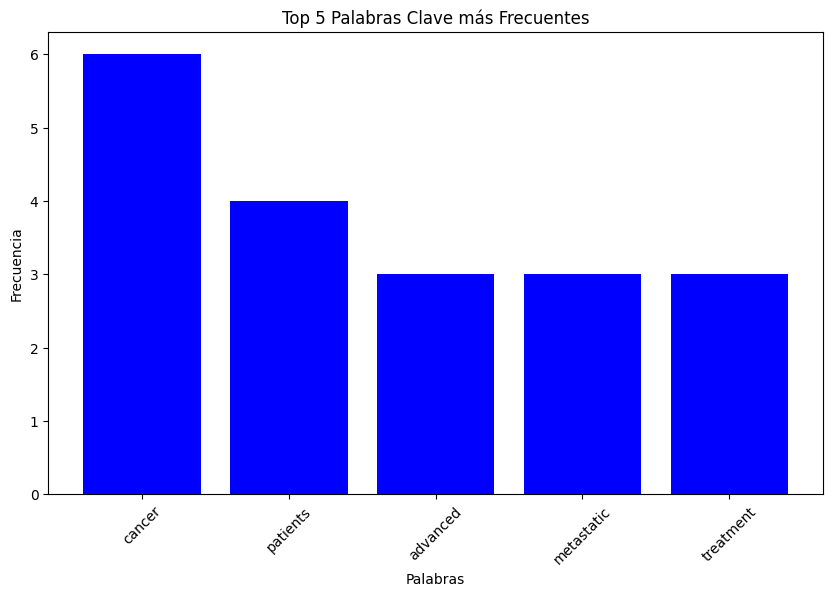

In [45]:
#TODO:
plt.figure(figsize=(10, 6))
plt.bar(top_words_df['Word'], top_words_df['Frequency'], color='blue')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 5 Palabras Clave más Frecuentes')
plt.xticks(rotation=45)
plt.show()


# Ejercicio 5: distribución de frecuencias según la ley de Zipf

La ley de Zipf es una observación empírica sobre la distribución de las frecuencias de las palabras en un lenguaje natural. Se basa en dos ideas principales:

* Distribución inversa: La frecuencia de aparición de una palabra es inversamente proporcional a su rango en una lista ordenada de todas las palabras del texto. Esto significa que las palabras más frecuentes tienen un menor rango y viceversa.

* Ley de los pequeños números: La frecuencia de una palabra es aproximadamente proporcional al inverso de su rango. En otras palabras, la frecuencia de la palabra es aproximadamente inversamente proporcional al rango de la palabra.

La función de la Ley de Zipf relaciona el rango de una palabra ($r$) con su frecuencia de aparición ($f$) mediante la siguiente expresión:

$f(r) = \frac{C}{r^s}$

dónde:
$f(r)$ es la frecuencia de la palabra en el rango $r$.
$C$ es una constante que depende del corpus de texto.
$s$ es el exponente de la Ley de Zipf, que suele ser aproximadamente entre 0,7 y 1,0 para los textos en inglés.


Esta función describe la relación entre el rango y la frecuencia de aparición de las palabras en un corpus de texto, siguiendo los principios de la Ley de Zipf.

Para comprobar si es cierto que los textos siguen la ley de Zipf, importaremos la declaración de independencia de Estados Unidos, y comprobaremos si la frecuencia de las palabras cuadra con la frecuencia esperada por la ley de Zipf

In [46]:
# Subir archivo
from google.colab import files
uploaded = files.upload()

Saving declaration-of-independence.txt to declaration-of-independence.txt


In [47]:
# TODO: importar archivo
file_name = "declaration-of-independence.txt"  # Actualiza con el nombre correcto si es necesario

with open(file_name, "r") as file:
    text = file.read()


In [48]:
#TODO: muestra el texto
text

"                      Declaration of Independence\n\n                   [Adopted in Congress 4 July 1776]\n\n\n\n   The Unanimous Declaration of the Thirteen United States of America\n\nWhen, in the course of human events, it becomes necessary for one people to \ndissolve the political bands which have connected them with another, and to \nassume among the powers of the earth, the separate and equal station to \nwhich the laws of nature and of nature's God entitle them, a decent respect \nto the opinions of mankind requires that they should declare the causes \nwhich impel them to the separation.\n\nWe hold these truths to be self-evident, that all men are created equal, \nthat they are endowed by their Creator with certain unalienable rights, that \namong these are life, liberty and the pursuit of happiness. That to secure \nthese rights, governments are instituted among men, deriving their just \npowers from the consent of the governed. That whenever any form of \ngovernment becomes

In [49]:
#TODO: eliminar la puntuación
translator = str.maketrans('', '', string.punctuation)
text = text.translate(translator)



In [50]:
#TODO:Obtener la frecuencia de las palabras ordenadas de más a menos
from collections import Counter

def top_freq_words(texto):
     # # TODO: convertir el texto a lower
    texto = texto.lower()
     # TODO: contar la frecuencia de las palabras
    words = texto.split()
    word_freq = Counter(words)
     # TODO: ordenar la frecuencia en orden descendente
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    return sorted_word_freq

In [51]:
# TODO: crear una dataframe con las frecuencias reales y las esperadas según la ley de Zipf
sorted_word_freq = top_freq_words(text)
def create_df_zip(sorted_word_freq):
    df = pd.DataFrame(sorted_word_freq, columns=['Word', 'Frequency'])
    df['Rank'] = df['Frequency'].rank(method='first', ascending=False)
    # C es la constante que depende del texto, que podría estimarse
    C = df['Frequency'].max()
    s = 1.0  # asumimos que s es 1 para simplificar
    df['Expected Frequency'] = C / (df['Rank'] ** s)
    return df

df_zip = create_df_zip(sorted_word_freq)

In [52]:
#TODO: muestra el df
df_zip.head()

,Word,Frequency,Rank,Expected Frequency
0,of,80,1.0,80.000000
1,the,78,2.0,40.000000
2,to,65,3.0,26.666667
3,and,57,4.0,20.000000
4,for,29,5.0,16.000000


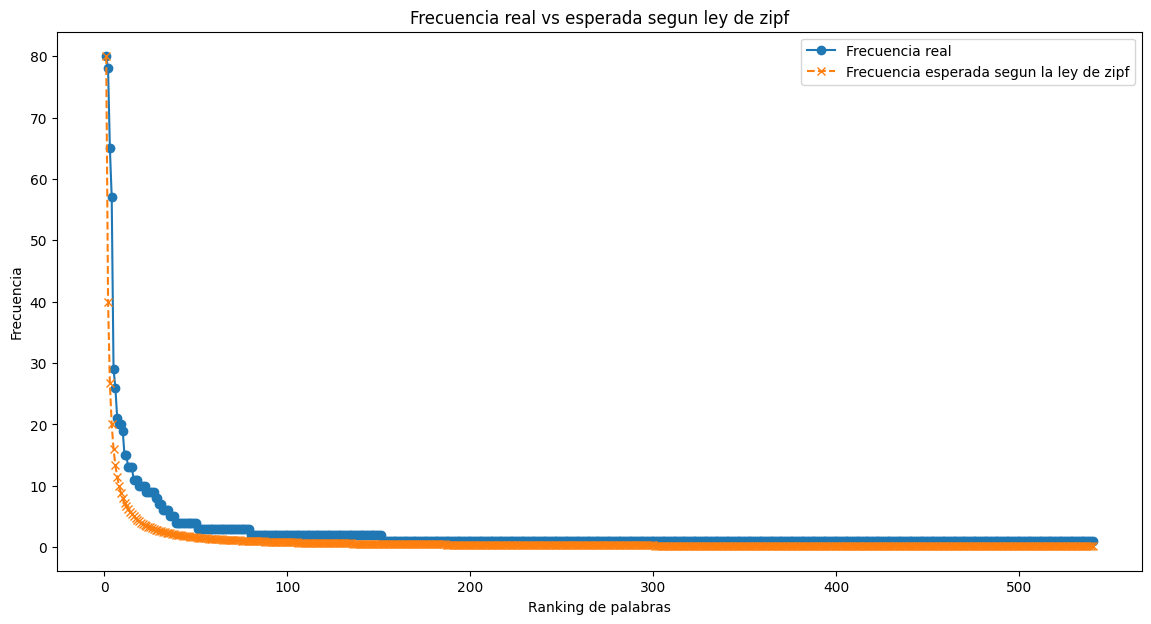

In [53]:
# Dibujar las frecuencias reales y las esperadas según la ley de Zipf
plt.figure(figsize=(14, 7))
plt.plot(df_zip['Rank'], df_zip['Frequency'], label='Frecuencia real', marker='o')
plt.plot(df_zip['Rank'], df_zip['Expected Frequency'], label='Frecuencia esperada segun la ley de zipf', linestyle='--', marker='x')
plt.xlabel('Ranking de palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia real vs esperada segun ley de zipf')
plt.legend()
plt.show()

Comenta qué ves en el gráfico. ¿Qué pasaría si sacáramos las stopwords del texto?

In [54]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# TODO: Saca las stop words en inglés
stop_words = set(stopwords.words('english'))
df_zip = df_zip[~df_zip['Word'].isin(stop_words)]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
# TODO: vuelve a mostrar la tabla df y el gráfico al excluir las stopwords
df_zip


,Word,Frequency,Rank,Expected Frequency
17,us,11,18.0,4.444444
18,people,10,19.0,4.210526
23,laws,9,24.0,3.333333
27,states,8,28.0,2.857143
30,right,7,31.0,2.580645
...,...,...,...,...
534,mutually,1,535.0,0.149533
535,pledge,1,536.0,0.149254
537,fortunes,1,538.0,0.148699
538,sacred,1,539.0,0.148423


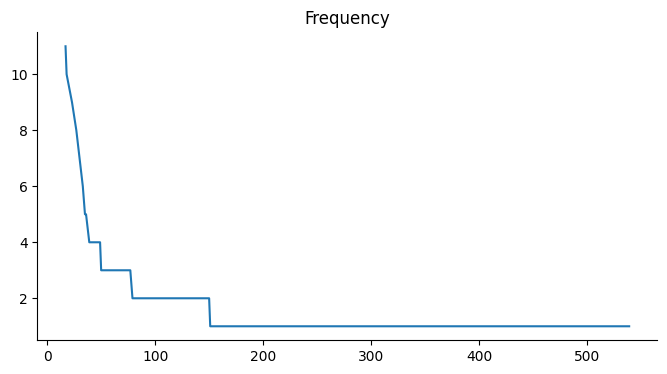

In [56]:
# @title Frequency
# Hecho por colab.google
from matplotlib import pyplot as plt
df_zip['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

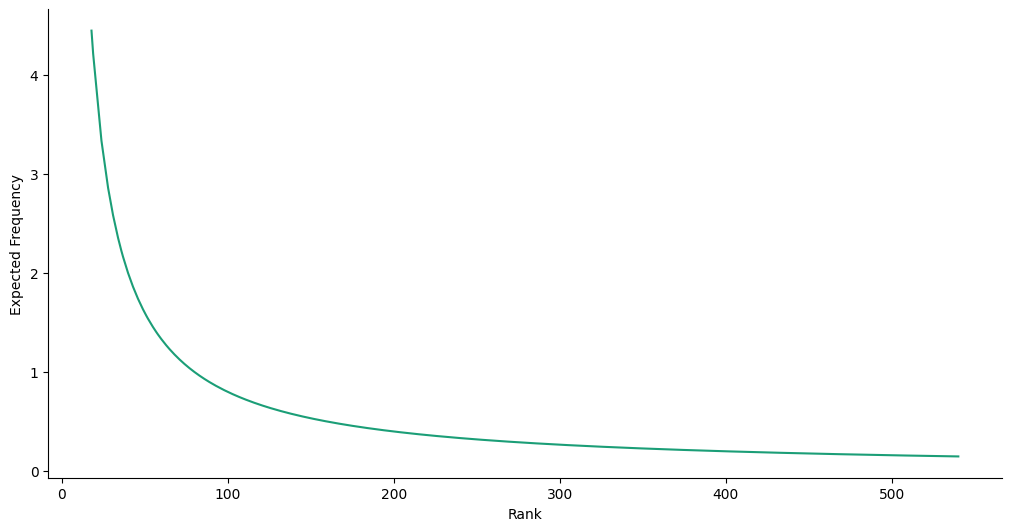

In [57]:
# @title Rank vs Expected Frequency
# Hecho por colab.google , los dejo que me gusto como eran
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Rank']
  ys = series['Expected Frequency']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_zip.sort_values('Rank', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rank')
_ = plt.ylabel('Expected Frequency')

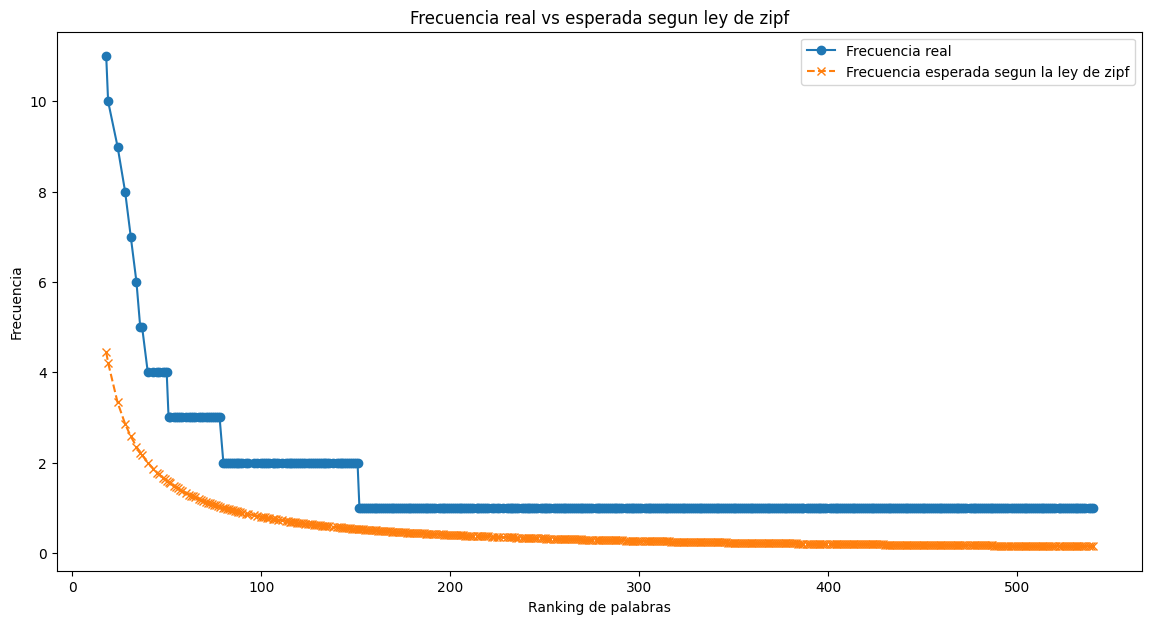

In [58]:
# TODO: Dibujar las frecuencias reales y las esperadas según la ley de Zipf (excluyendo las stopwords)
# Dibujar las frecuencias reales y las esperadas según la ley de Zipf
plt.figure(figsize=(14, 7))
plt.plot(df_zip['Rank'], df_zip['Frequency'], label='Frecuencia real', marker='o')
plt.plot(df_zip['Rank'], df_zip['Expected Frequency'], label='Frecuencia esperada segun la ley de zipf', linestyle='--', marker='x')
plt.xlabel('Ranking de palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia real vs esperada segun ley de zipf')
plt.legend()
plt.show()

Comenta: ¿qué gráfico tiene más sentido?

Tiene mas sentido el esperado, ya que el real va a escalones, tambien es verdad que es un documento pequeno y quizas por eso no vaya a verse bien su utilidad.